In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import keras
import math
from keras.models import Sequential
from keras.layers import Dense
%matplotlib inline

In [40]:
df = pd.read_csv('input/traffic/DataSet/datatrain27303.csv')
df.head()

,timestamp,hourly_traffic_count,green_light
0,2015-10-04 00:00:00,3,15
1,2015-10-04 00:05:00,16,25
2,2015-10-04 00:10:00,9,15
3,2015-10-04 00:15:00,12,25
4,2015-10-04 00:20:00,19,25


In [41]:
df1 = df.reset_index()['hourly_traffic_count']
df1.head()

0     3
1    16
2     9
3    12
4    19
Name: hourly_traffic_count, dtype: int64

In [42]:
df2 = df.reset_index()['green_light']
df2.head()

0    15
1    25
2    15
3    25
4    25
Name: green_light, dtype: int64

In [43]:
df1 = df1.iloc[:9792,]
df1.tail()

9787    23
9788    25
9789    16
9790    18
9791    25
Name: hourly_traffic_count, dtype: int64

In [44]:
df2 = df2.iloc[:9792,]
df2.tail()

9787    35
9788    35
9789    25
9790    25
9791    35
Name: green_light, dtype: int64

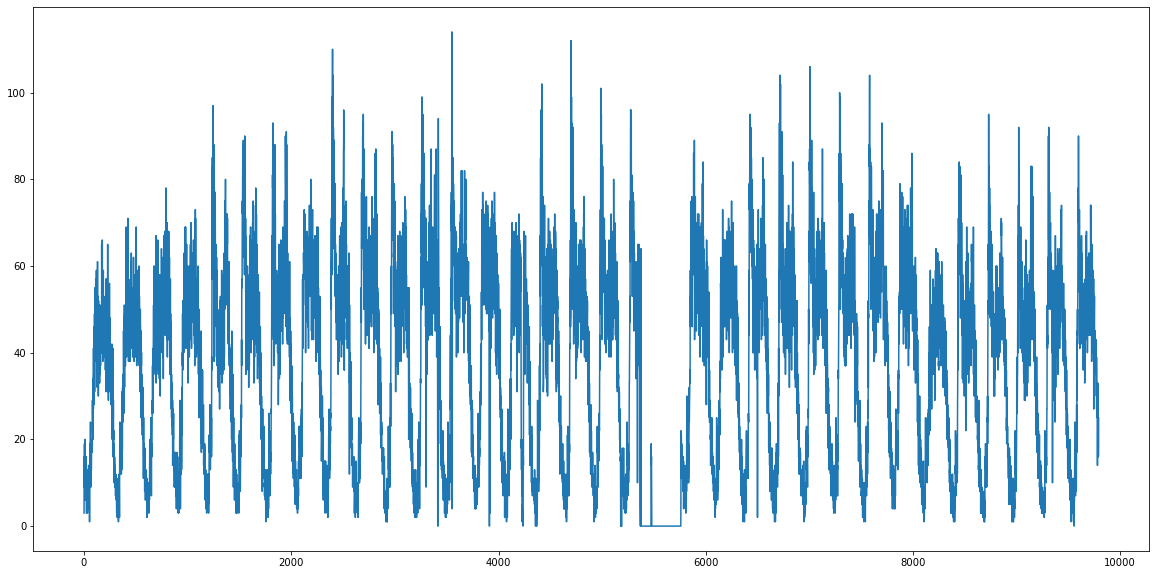

In [45]:
plt.figure(figsize=(20,10))
plt.plot(df1)
plt.show()

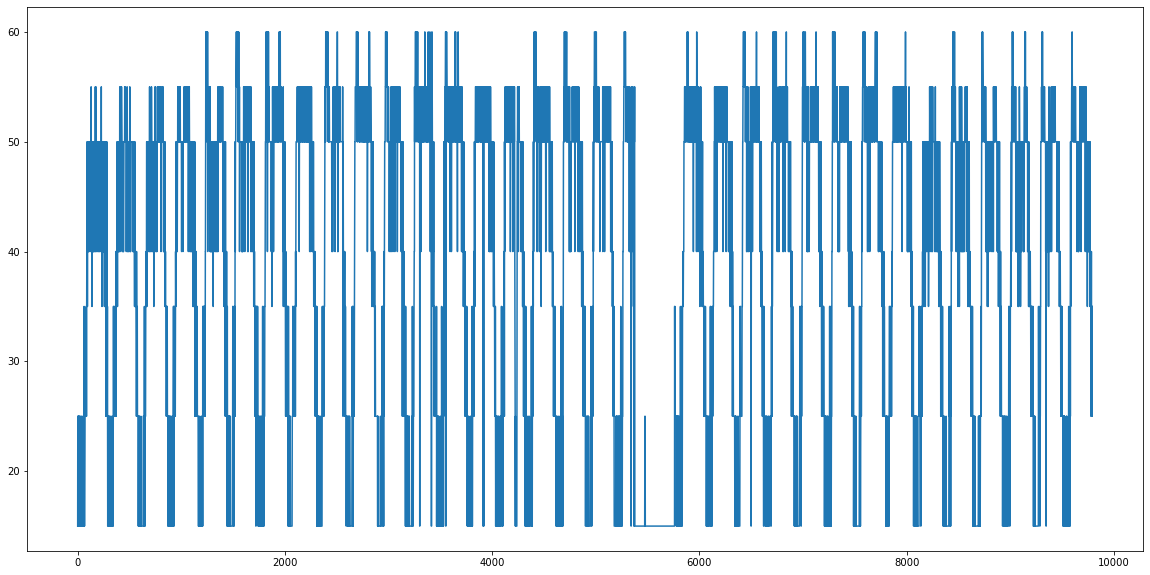

In [46]:
plt.figure(figsize=(20,10))
plt.plot(df2)
plt.show()

In [47]:
def create_dataset(dataset, window=1):
    dataX, dataY= [], []
    for i in range(len(dataset)-window-1):
        a = dataset[i:(i+window),0]
        dataX.append(a)
        dataY.append(dataset[i+window,0])
    return np.array(dataX), np.array(dataY)

In [48]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
df2 = scaler.fit_transform(np.array(df2).reshape(-1,1))

In [49]:
training_size = int(len(df1)*0.80)
test_size = len(df1)-training_size
train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]


In [50]:
atraining_size = int(len(df2)*0.80)
atest_size = len(df2)-atraining_size
atrain_data, atest_data = df2[0:atraining_size,:], df2[atraining_size:len(df2),:1]

In [59]:
window = 288
X_train,y_train = create_dataset(train_data,window)
X_test, y_test = create_dataset(test_data,window)

In [60]:
window = 288
X_atrain,y_atrain = create_dataset(atrain_data,window)
X_atest, y_atest = create_dataset(atest_data,window)

In [61]:
model = Sequential()
model.add(Dense(40, input_dim=window, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1))

In [62]:
from tensorflow.keras import optimizers

In [63]:
#opt  = tensorflow.optimizers.Adagrad(learning_rate = 0.05)

tf.keras.optimizers.Adagrad(
    learning_rate=0.001, initial_accumulator_value=0.1, epsilon=1e-07,
    name='Adagrad'
)

In [64]:
model.compile(
    loss='mean_squared_error',
    optimizer='Adagrad')

In [65]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 40)                11560     
_________________________________________________________________
dense_9 (Dense)              (None, 50)                2050      
_________________________________________________________________
dense_10 (Dense)             (None, 40)                2040      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 41        
Total params: 15,691
Trainable params: 15,691
Non-trainable params: 0
_________________________________________________________________


In [67]:
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
755/755 [==============================] - 2s 1ms/step - loss: 0.0590
Epoch 2/100
755/755 [==============================] - 1s 1ms/step - loss: 0.0117
Epoch 3/100
755/755 [==============================] - 1s 1ms/step - loss: 0.0100
Epoch 4/100
755/755 [==============================] - 1s 1ms/step - loss: 0.0091
Epoch 5/100
755/755 [==============================] - 1s 1ms/step - loss: 0.0087
Epoch 6/100
755/755 [==============================] - 1s 1ms/step - loss: 0.0083
Epoch 7/100
755/755 [==============================] - 1s 1ms/step - loss: 0.0082
Epoch 8/100
755/755 [==============================] - 1s 1ms/step - loss: 0.0080
Epoch 9/100
755/755 [==============================] - 1s 1ms/step - loss: 0.0076
Epoch 10/100
755/755 [==============================] - 1s 1ms/step - loss: 0.0076
Epoch 11/100
755/755 [==============================] - 1s 1ms/step - loss: 0.0072
Epoch 12/100
755/755 [==============================] - 1s 1ms/step - loss: 0.0073
Epoch 13/100


In [68]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [69]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

In [70]:
train_predict = train_predict.astype(int)
test_predict = test_predict.astype(int)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [71]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
print('RMSE-train:',math.sqrt(mean_squared_error(y_train,train_predict)))
print('MAE-train:',mean_absolute_error(y_train,train_predict))
print('R_2-train:',r2_score(y_train,train_predict))

RMSE-train: 3.357064692705135
MAE-train: 2.4172852598091197
R_2-train: 0.8721653040365263


In [72]:
print('RMSE-test:',math.sqrt(mean_squared_error(y_test,test_predict)))
print('MAE-test:',mean_absolute_error(y_test,test_predict))
print('R_2-train:',r2_score(y_test,test_predict))

RMSE-test: 3.042808346697264
MAE-test: 2.2778443113772453
R_2-train: 0.8529054463272734


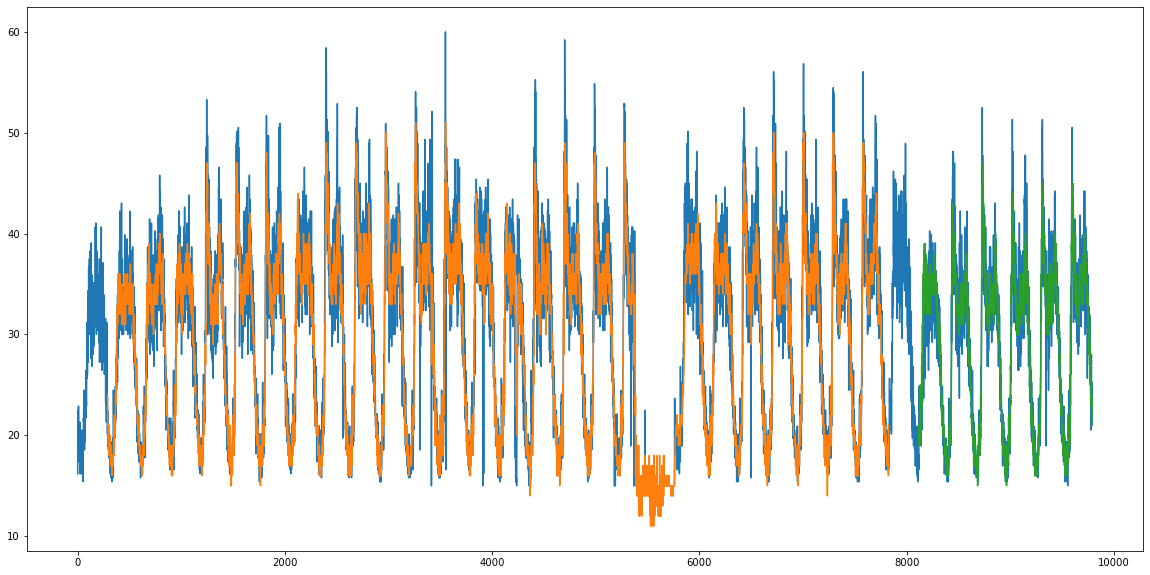

In [93]:
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[window:len(train_predict)+window, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(window*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()